# Convolutional Neural Network
#### Aquí importamos librerías, el script necesario (return_pixel_df) y ponemos algunos datos de set u

In [1]:
import scipy.io
import numpy as np
import pandas as pd
import return_pixel_df
import logging as log
from IPython.display import display
import return_data

num_img = 2000
size    = 9248       # 220 -> 2^2 · 5 · 11
size1, size2 = 68, 136
# size, size1, size2 = 40000, 200, 200
parity_matrix_path = 'Matlab/originales/parity1024m.mat'   # L -> Pseudo random
random_matrix_path = 'Matlab/originales/urand1024_2.mat'            # R -> True random
data               = ['Data', 'Data']

## Read Data
#### El DataFrame tendrá tantas features como píxeles tengan las fotos

In [2]:
import mat73
import scipy.io

#--------------------------------------------------------------------------------------------#
#                                             Read Data                                      #
#--------------------------------------------------------------------------------------------#

parity = scipy.io.loadmat(parity_matrix_path)  # deprecated
# parity = mat73.loadmat(parity_matrix_path)
parity = parity[data[0]].astype(np.float)

random = scipy.io.loadmat(random_matrix_path)  # deprecated
# random = mat73.loadmat(random_matrix_path)
random = random[data[1]].astype(np.float)


parity = parity.flatten()
random = random.flatten()

#--------------------------------------------------------------------------------------------#
#                                             DataFrame                                      #
#--------------------------------------------------------------------------------------------#

X = []
y = []

i = 0
for j in range(num_img):
    row = []
    for k in range(size):
        row.append(parity[i])
        i += 1
    X.append(row)
    y.append('0')       # Parity label

i = 0
for j in range(num_img):
    row = []
    for k in range(size):
        row.append(random[i])
        i += 1
    X.append(row)
    y.append('1')       # Urand2 label

df_pixel = pd.DataFrame(X)
df_pixel .insert(loc=0, column='Label', value=y)
display  (df_pixel)

,Label,0,1,2,3,4,5,6,7,8,...,9238,9239,9240,9241,9242,9243,9244,9245,9246,9247
0,0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
3,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3996,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3997,1,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
3998,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


## Plot Data

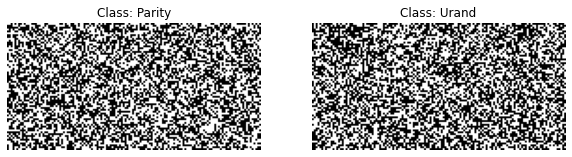

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
label = ['Parity', 'Urand']
img_ = [np.reshape(X[0], (size1, size2)).T, np.reshape(X[num_img], (size1, size2)).T]
for i in range (len(label)):
    plt.subplot(1, 2, i+1)
    # img = df_pixel[df_pixel['Label']==i].iloc[0,1:].values
    img = img_[i]
    img = img.reshape((size1, size2))
    plt.imshow(img, cmap='gray')
    plt.title("Class: " + label[i])
    plt.axis('off')
    
plt.show()

## Reshape

Nuestras imágenes son de size x size pero para usar Keras tienen que ser matrices 3D. Es por eso que les cambiamos la forma a size x size x 1, usaremos 1 canal puesto que son fotos en blanco y negro.

In [4]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical     # Label Encoding

X = df_pixel.drop(["Label"], axis=1)
y = df_pixel['Label']
y = to_categorical(y, num_classes=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train = X_train.values.reshape(-1, size1, size2, 1)
X_test  = X_test.values.reshape (-1, size1, size2, 1)

print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)


X_train shape (2800, 68, 136, 1)
X_test shape (1200, 68, 136, 1)
y_train shape (2800, 2)
y_test shape (1200, 2)


# Implementación de la red neuronal convolucional

#### Optimizador

In [5]:
from keras.optimizers import RMSprop, Adam

optimizer = Adam(learning_rate=0.001, 
                 beta_1=0.9, 
                 beta_2=0.999, 
                 epsilon=None, 
                 decay=0.0, 
                 amsgrad=False)

In [72]:
#-------------------------------------------------------------------------------------------#
#                                             Framework                                     #
#-------------------------------------------------------------------------------------------#

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, MaxPool2D

#-------------------------------------------------------------------------------------------#
#                                               Model                                       #
#-------------------------------------------------------------------------------------------#

model = Sequential()    # Linear Layering

model.add(Conv2D(16, (3, 3), input_shape = (size1, size2, 1), activation = 'relu'))         # 32 filtros convolucionales 3x3
model.add(MaxPooling2D(pool_size = (2, 2)))                                                 # tensor is down-sampled by half. Agrupacion

# model.add(Conv2D(128, (3, 3), input_shape = (size1, size2, 1), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))

# model.add(Conv2D(256, (3, 3), input_shape = (size1, size2, 1), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())                                                                        # flatten, projecting to lower dimensions
model.add(Dense(units = 64, activation = 'relu'))                                           # input layer with 128 inputs to prevent overfitting
model.add(Dense(units = 2, activation = 'sigmoid'))                                         # activation layer. softmax para recibir probabilidades

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])  # compiling
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 66, 134, 16)       160       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 33, 67, 16)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 35376)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                2264128   
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 130       
Total params: 2,264,418
Trainable params: 2,264,418
Non-trainable params: 0
_________________________________________________________________


In [73]:
epochs      = 20
batchSize   = 100

cnn  = model.fit(x= X_train, y= y_train, validation_data=(X_test, y_test), steps_per_epoch = 50, 
                                                        epochs = epochs, validation_steps=10, 
                                                        batch_size=batchSize)

Epoch 1/20
50/50 [==============================] - 14s 260ms/step - loss: 4.7272 - accuracy: 0.4895 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 2/20
50/50 [==============================] - 11s 222ms/step - loss: 0.6930 - accuracy: 0.5392 - val_loss: 0.6928 - val_accuracy: 0.5300
Epoch 3/20
50/50 [==============================] - 13s 263ms/step - loss: 0.6898 - accuracy: 0.5357 - val_loss: 0.6926 - val_accuracy: 0.5080
Epoch 4/20
50/50 [==============================] - 13s 251ms/step - loss: 0.6441 - accuracy: 0.6143 - val_loss: 0.7232 - val_accuracy: 0.5100
Epoch 5/20
50/50 [==============================] - 12s 239ms/step - loss: 0.5043 - accuracy: 0.8112 - val_loss: 0.7430 - val_accuracy: 0.5240
Epoch 6/20
50/50 [==============================] - 12s 233ms/step - loss: 0.3871 - accuracy: 0.9498 - val_loss: 0.9743 - val_accuracy: 0.5110
Epoch 7/20
50/50 [==============================] - 12s 239ms/step - loss: 0.3155 - accuracy: 0.9817 - val_loss: 0.9839 - val_accuracy: 0.5170

# Evaluación del modelo

In [74]:
print("Accuracy after fitting: {:.2f}%".format(cnn.history['accuracy'][-1]*100))

Accuracy after fitting: 100.00%


#### Para una mayor precisión, puede aumentar el número de épocas o puede cambiar los parámetros en las capas o puede agregar una capa adicional al modelo.

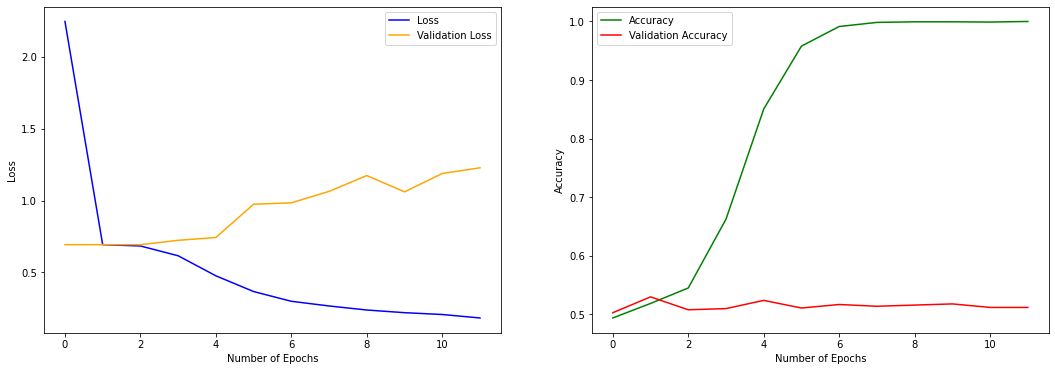

In [75]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(cnn.history['loss'], color="blue", label = "Loss")
plt.plot(cnn.history['val_loss'], color="orange", label = "Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(cnn.history['accuracy'], color="green", label = "Accuracy")
plt.plot(cnn.history['val_accuracy'], color="red", label = "Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Epochs")
plt.legend()
plt.show()

In [76]:
score = model.evaluate(X_test, y_test)
print("Test Loss: {:.4f}".format(score[0]))
print("Test Accuracy: {:.2f}%".format(score[1]*100))

38/38 [==============================] - 1s 25ms/step - loss: 1.2558 - accuracy: 0.5125
Test Loss: 1.2558
Test Accuracy: 51.25%


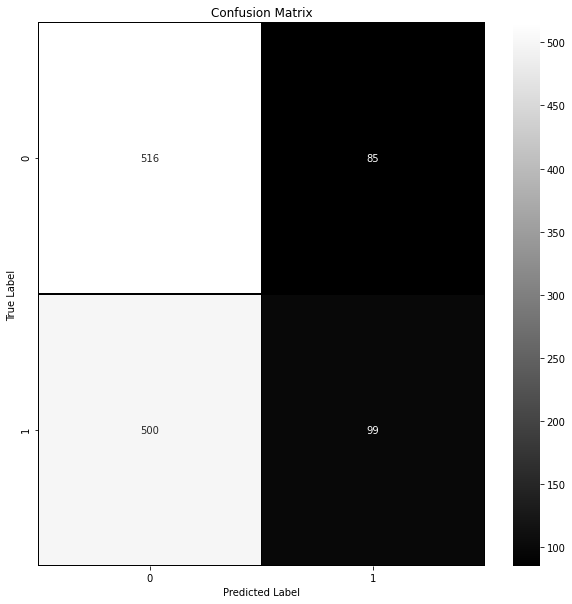

In [77]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(y_test, axis = 1)
confusionMatrix = confusion_matrix(Y_true, Y_pred_classes)

f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(confusionMatrix, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()